In [142]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# EDA

In [143]:
df = pd.read_csv('heart.csv')

In [144]:

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [145]:

df.shape

(918, 12)

In [146]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [147]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [148]:

df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

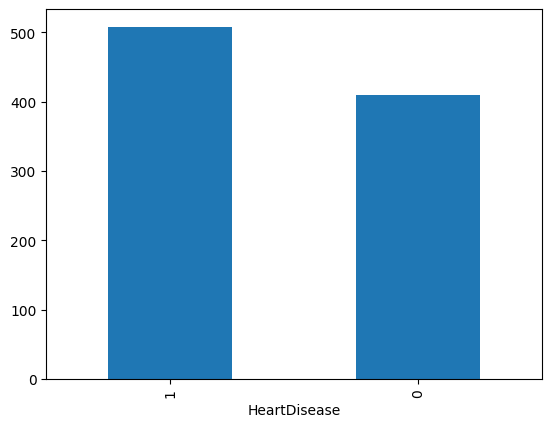

In [149]:
df['HeartDisease'].value_counts().plot(kind = 'bar')

In [150]:

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [151]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

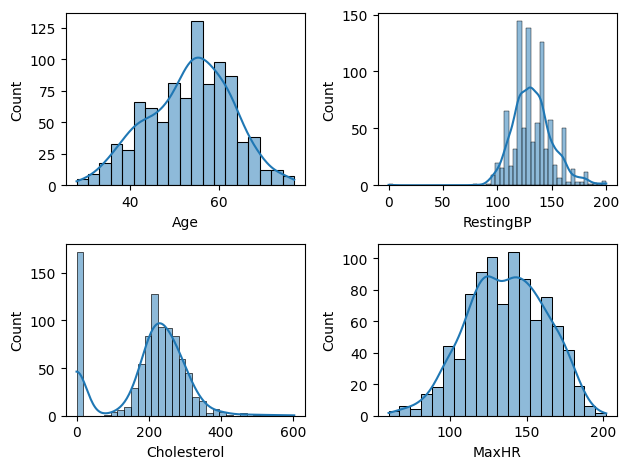

In [152]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

plotting("Age",1)
plotting("RestingBP",2)
plotting("Cholesterol",3)
plotting("MaxHR",4)

plt.tight_layout()

In [153]:

cholesterol_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()


df['Cholesterol'] = df['Cholesterol'].replace(0, cholesterol_mean)

df['Cholesterol'] = df['Cholesterol'].round(2)

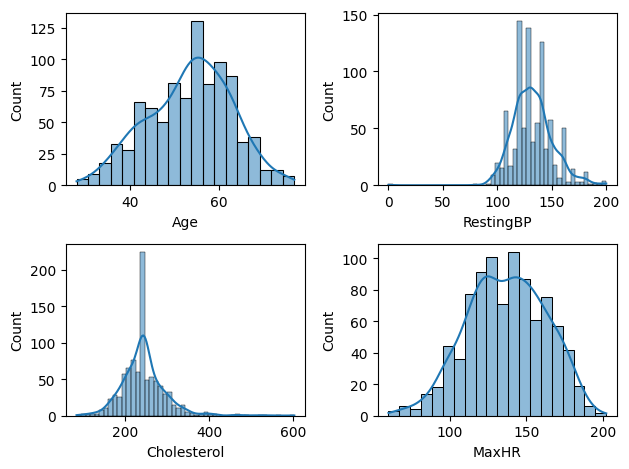

In [154]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

plotting("Age",1)
plotting("RestingBP",2)
plotting("Cholesterol",3)
plotting("MaxHR",4)

plt.tight_layout()

In [155]:

resting_bp_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()

df['RestingBP'] = df['RestingBP'].replace(0, resting_bp_mean)

df['RestingBP'] = df['RestingBP'].round(2)

<Axes: xlabel='Sex', ylabel='count'>

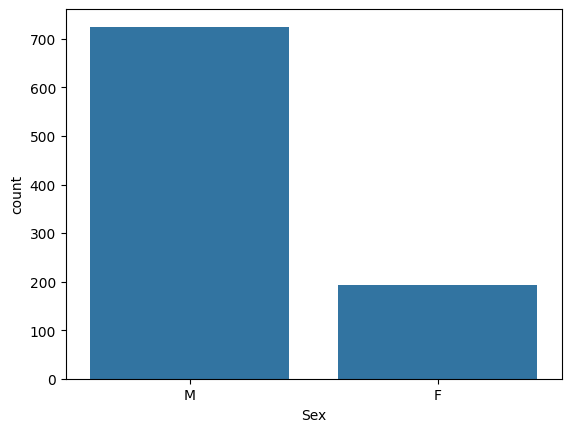

In [156]:
sns.countplot(x = df['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

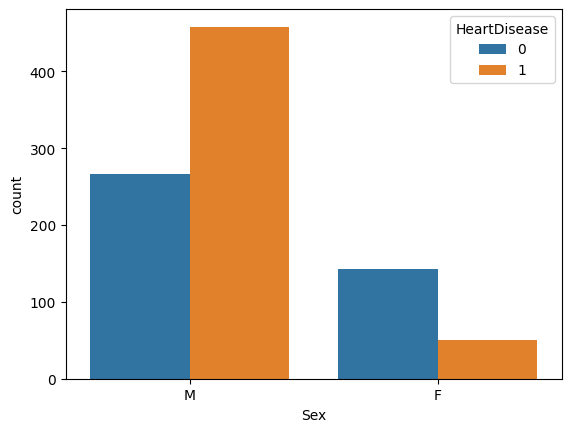

In [157]:
sns.countplot(x = df['Sex'],hue = df['HeartDisease']) 

<Axes: xlabel='ChestPainType', ylabel='count'>

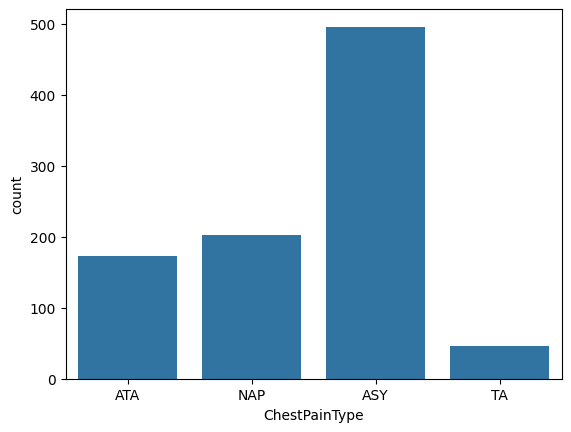

In [158]:
sns.countplot(x=df['ChestPainType'])

<Axes: xlabel='ChestPainType', ylabel='count'>

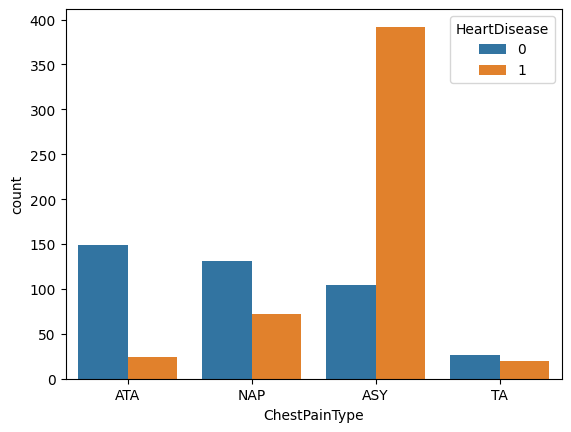

In [159]:
sns.countplot(x = df['ChestPainType'],hue = df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

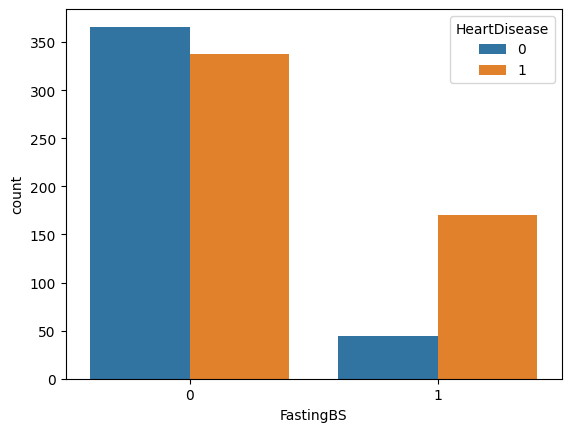

In [160]:

sns.countplot(x = df['FastingBS'],hue = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

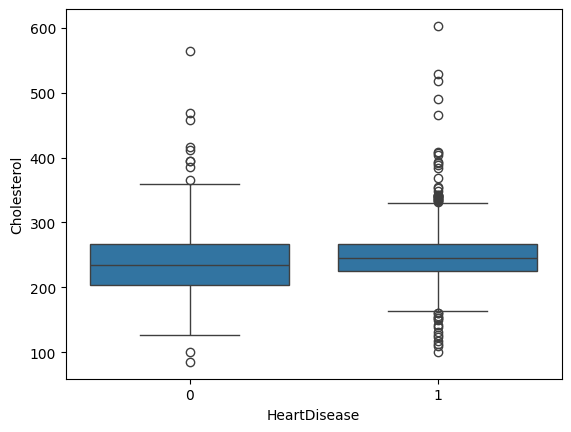

In [161]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)

<Axes: >

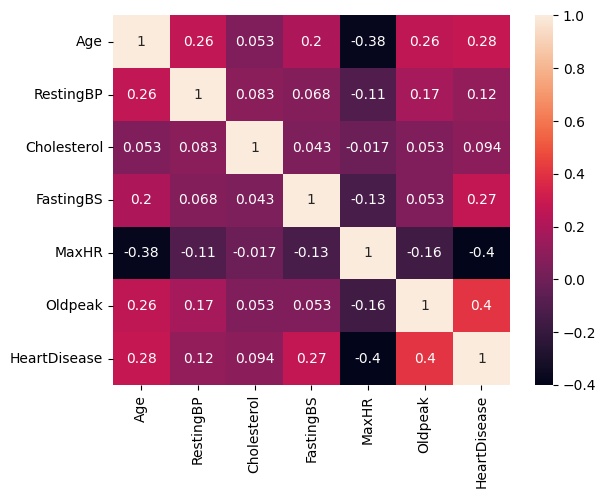

In [162]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data Cleaning

In [163]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [164]:
df_encoded=df.copy()

In [165]:
df_encoded.shape

(918, 12)

In [166]:
df_encoded.drop_duplicates(inplace=True)

In [167]:
df_encoded.shape

(918, 12)

In [168]:
df_encoded.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# Data Pre-Processing

In [169]:
df_encoded['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [170]:
#encoding
df_encoded['Sex']=df_encoded['Sex'].map({'M': 1, "F":0}) 

In [171]:
df_encoded.rename(columns={
    'Sex':'Sex_M'},inplace=True)

In [174]:
df_encoded.head()


,Age,Sex_M,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [175]:
df_encoded['ExerciseAngina']=df_encoded['ExerciseAngina'].map({'Y': 1, "N":0}) 

In [176]:
df_encoded.rename(columns={
    'ExerciseAngina':'ExerciseAngina_Y'},inplace=True)

In [177]:
df_encoded.head()

,Age,Sex_M,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina_Y,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140.0,289.0,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160.0,180.0,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130.0,283.0,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138.0,214.0,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150.0,195.0,0,Normal,122,0,0.0,Up,0


In [178]:
df_encoded = pd.get_dummies(df_encoded,drop_first=True)

In [179]:
df_encoded.head()

,Age,Sex_M,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina_Y,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140.0,289.0,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160.0,180.0,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130.0,283.0,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138.0,214.0,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150.0,195.0,0,122,0,0.0,0,False,True,False,True,False,False,True


In [181]:
df_encoded = df_encoded.astype(int) 

In [182]:
df_encoded.head()

,Age,Sex_M,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina_Y,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0,0,0,1,0,1,0,0,1


In [186]:
#scaling

from sklearn.preprocessing import StandardScaler

numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']
scaler = StandardScaler()

df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [187]:
df_encoded.head()

,Age,Sex_M,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina_Y,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1,0.414885,0.834754,0,1.382928,0,0,0,1,0,0,1,0,0,1
1,-0.478484,0,1.527224,-1.210675,0,0.754157,0,1,1,0,1,0,1,0,1,0
2,-1.751359,1,-0.141284,0.722161,0,-1.525138,0,0,0,1,0,0,0,1,0,1
3,-0.584556,0,0.303651,-0.572651,0,-1.132156,1,1,1,0,0,0,1,0,1,0
4,0.051881,1,0.971054,-0.929194,0,-0.581981,0,0,0,0,1,0,1,0,0,1


# Features Selection

In [188]:
df_encoded.columns

Index(['Age', 'Sex_M', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina_Y', 'Oldpeak', 'HeartDisease', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [190]:
from scipy.stats import pearsonr

#------------------------
# Person Correlation Calculation
#-------------------------

selected_features =[  ## list of features
    'Age', 'Sex_M', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'
]

correlations = {
    feature: pearsonr(df_encoded[feature], df_encoded['HeartDisease'])[0]
    for feature in selected_features
}


correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])

correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
13,ST_Slope_Flat,0.554134
12,ExerciseAngina_Y,0.494282
6,Oldpeak,0.392385
1,Sex_M,0.305445
0,Age,0.282039
4,FastingBS,0.267291
2,RestingBP,0.117909
11,RestingECG_ST,0.102527
3,Cholesterol,0.092586
9,ChestPainType_TA,-0.054790
